In [22]:
# !pip install plotly
# !pip install -U kaleido

  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)


In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import IPython.display as display
from IPython.display import HTML
from tqdm import tqdm

In [2]:
GITHUB_RENDER = True

In [3]:
def basic_bar_plot(x, y, xt, yt, title, rot):
    plt.bar(x, y)
    plt.xlabel(xt)
    plt.ylabel(yt)
    plt.title(title)
    plt.xticks(rotation=rot)
    for i, curr_y in enumerate(y):
        plt.text(i, curr_y, str(curr_y), ha='center', va='bottom')
    plt.show()
    
def basic_bar_plotly(x, y, xt, yt, title, rot, COLOR, WIDTH, HEIGHT):
    fig = px.bar(x=x, y=y, labels={'x': xt, 'y': yt}, title=title)
    fig.update_traces(marker_color=COLOR, text=y, textposition='outside')
    fig.update_xaxes(tickangle=rot)
    fig.update_layout(title_x=0.5, width=WIDTH, height=HEIGHT, yaxis=dict(tickformat=',d'))
    if GITHUB_RENDER:
        image_bytes = pio.to_image(fig, format='png')
        display.display(display.Image(image_bytes))
    else:
        fig.show()
        
def basic_hist_plotly(data_values, COLOR, xt, yt, title):
    x_range = int(np.ceil(max(data_values))) - int(np.floor(min(data_values)))
    fig = go.Figure(data=[go.Histogram(x=data_values, nbinsx=x_range+1, marker=dict(color=COLOR))])
    fig.update_xaxes(
        tickmode='linear',
        tick0=min(data_values),
        dtick=1,
        title_text=xt
    )
    fig.update_yaxes(
        title_text=yt
    )
    fig.update_layout(
        title_x=0.5,
        autosize=False,
        width=800,
        height=600,
        title_text=title
    )
    if GITHUB_RENDER:
        image_bytes = pio.to_image(fig, format='png')
        display.display(display.Image(image_bytes))
    else:
        fig.show()
    
def s2s_plot(subreddit, rows, imgs, label1, label2, xt, yt, title):
    width = 0.35
    x = np.arange(len(subreddit))
    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, imgs, width, label=label1)
    bars2 = ax.bar(x + width/2, rows, width, label=label2)
    ax.set_xlabel(xt)
    ax.set_ylabel(yt)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(subreddit, rotation=75)
    ax.legend()
    ax.bar_label(bars1, padding=3)
    ax.bar_label(bars2, padding=3)
    plt.tight_layout()
    plt.show()
    
def s2s_plotly(subreddit, rows, imgs, label1, label2, xt, yt, title):
    x = np.arange(len(subreddit))
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=x,
        y=imgs,
        name=label1,
        marker=go.bar.Marker(color='#17BECF'),
    ))
    fig.add_trace(go.Bar(
        x=x,
        y=rows,
        name=label2,
        marker=go.bar.Marker(color='#F58518'),
    ))
    fig.update_layout(
        barmode='group', 
        title=title, 
        title_x=0.5,
        xaxis_tickangle=-45, 
        xaxis=dict(
            title=xt,
            tickvals = x, 
            ticktext = subreddit
        ), 
        yaxis=dict(
            title=yt
        ),
        width=1200,
        height=800
    )
    if GITHUB_RENDER:
        image_bytes = pio.to_image(fig, format='png')
        display.display(display.Image(image_bytes))
    else:
        fig.show()

def get_image_count():
    main_folder = '../data/files'
    file_row_counts = {}
    file_img_count = {}
    for file in os.listdir(main_folder):
        file_path = os.path.join(main_folder, file)
        df = pd.read_csv(file_path)
        row_count = len(df)
        df.dropna(subset=['image_location'], inplace=True)
        urls = list(df['image_location'].values)
        cnt = 0
        for url in urls:
            url = "." + url
            if os.path.exists(url):
                cnt += 1
        file_row_counts[file] = row_count
        file_img_count[file] = cnt
    
    subreddit = list(file_row_counts.keys())
    subreddit = [x[8:].split('.')[0] for x in subreddit]
    rows = list(file_row_counts.values())
    imgs = list(file_img_count.values())
    return subreddit, rows, imgs

# Reddit

## Image Count upon Faiss Semantic Search Filtering

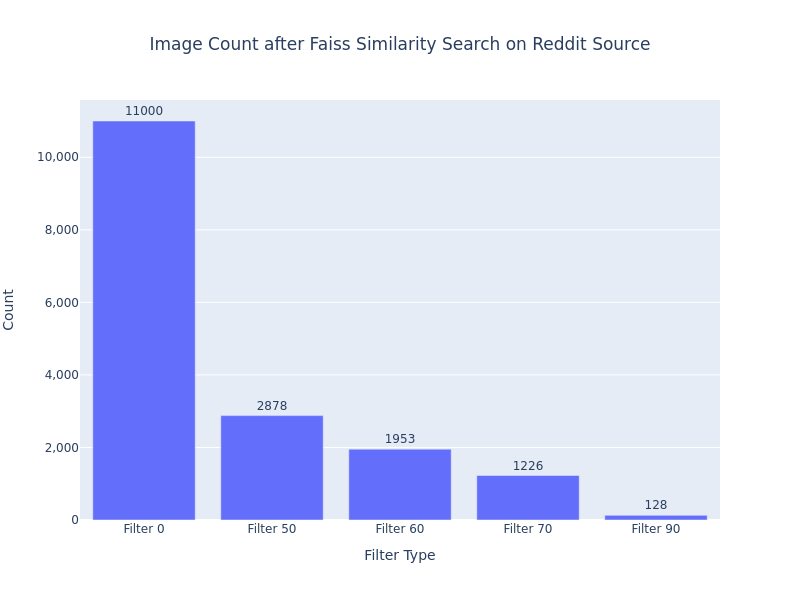

In [17]:
x = ["Filter 0", "Filter 50", "Filter 60", "Filter 70", "Filter 90"]
df50 = pd.read_csv('../out/new_filtered_df_50_final.csv')
df60 = pd.read_csv('../out/new_filtered_df_60_final.csv')
df70 = pd.read_csv('../out/new_filtered_df_70_final.csv')
df90 = pd.read_csv('../out/new_filtered_df_90_final.csv')
y = [11000, len(df50), len(df60), len(df70), len(df90)]
basic_bar_plotly(x, y, "Filter Type", "Count", \
    "Image Count after Faiss Similarity Search on Reddit Source", 0, "#636EFA", 800, 600)

## Image Count in each Subreddit after performing Similarity Search

In [18]:
subreddit = set()
dict50, dict60, dict70, dict90 = {}, {}, {}, {}
def create_dict(df, idct):
    for val in list(df['reddit image'].values):
        v = val.split('/')[0]
        subreddit.add(v)
        if v not in idct:
            idct[v] = 0
        idct[v] += 1
        
def create_list(subreddit, dct):
    lst = []
    for sr in subreddit:
        if sr not in dct:
            lst.append(0)
        else:
            lst.append(dct[sr])
    return lst
        
create_dict(df50, dict50)
create_dict(df60, dict60)
create_dict(df70, dict70)
create_dict(df90, dict90)
subreddit = list(subreddit)

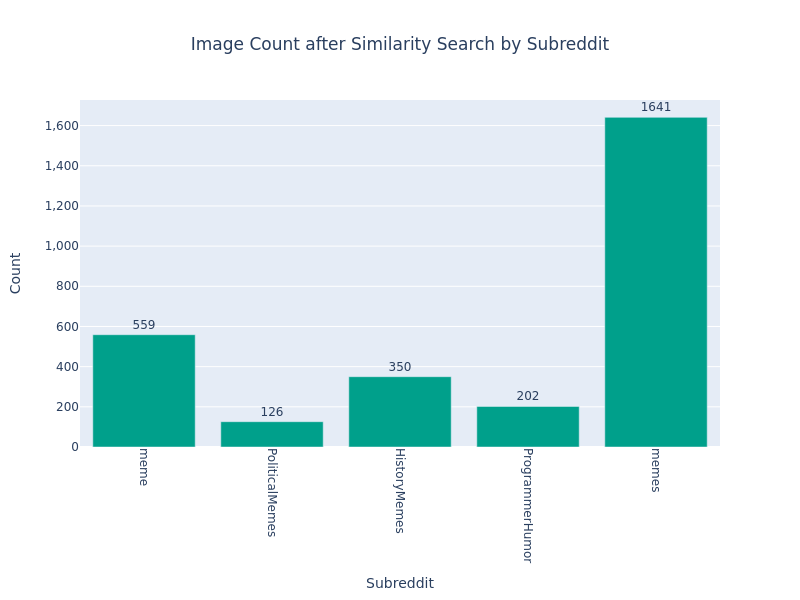

In [19]:
l = create_list(subreddit, dict50)
basic_bar_plotly(subreddit, l, "Subreddit", "Count", \
    "Image Count after Similarity Search by Subreddit", 90, "#00A08B", 800, 600)

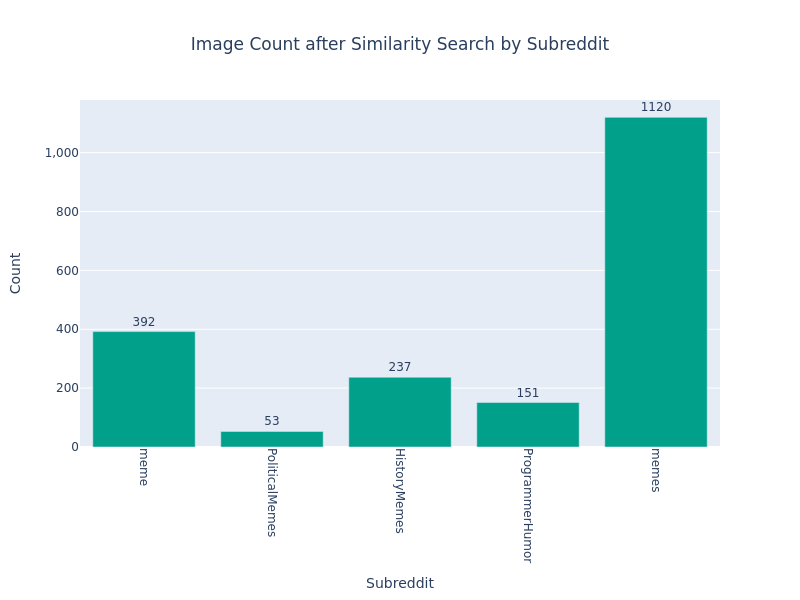

In [20]:
l = create_list(subreddit, dict60)
basic_bar_plotly(subreddit, l, "Subreddit", "Count", \
    "Image Count after Similarity Search by Subreddit", 90, "#00A08B", 800, 600)

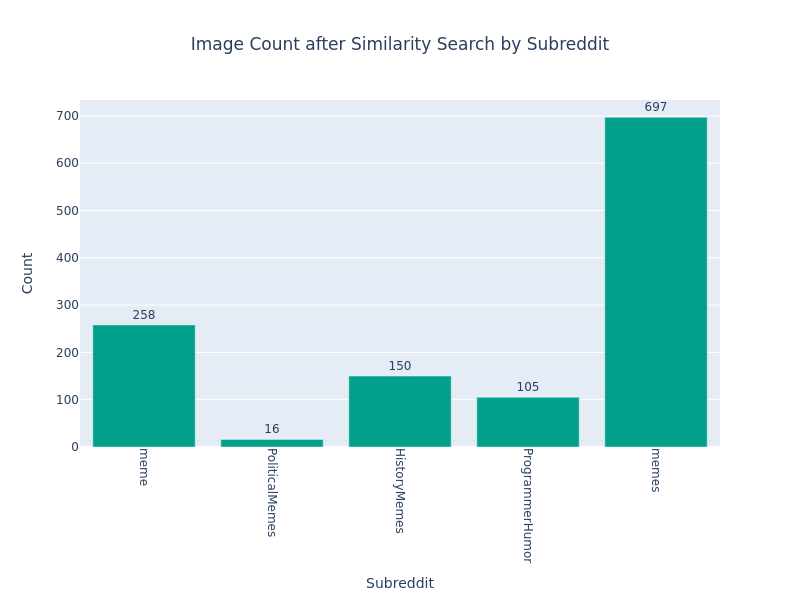

In [21]:
l = create_list(subreddit, dict70)
basic_bar_plotly(subreddit, l, "Subreddit", "Count", \
    "Image Count after Similarity Search by Subreddit", 90, "#00A08B", 800, 600)

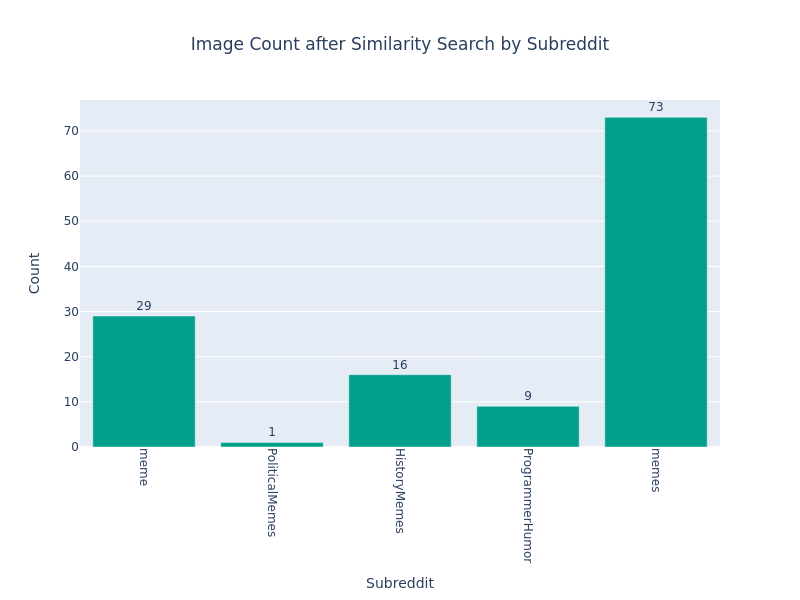

In [22]:
l = create_list(subreddit, dict90)
basic_bar_plotly(subreddit, l, "Subreddit", "Count", \
    "Image Count after Similarity Search by Subreddit", 90, "#00A08B", 800, 600)

## IMKG Class Distribution for 60% Filter

In [23]:
imkg_templates = pd.read_csv('../graph/out/imkg_templates.tsv', sep='\t')
node1 = list(imkg_templates['node1'].values)
node2 = list(imkg_templates['node2'].values)
df_imkg_nodes = list(df60['imkg image'].values)
df_imkg_nodes = [x.split('/')[-1].split('.')[0] for x in df_imkg_nodes]
back_dict = {}
final_dict = {}
for x, y in tqdm(zip(node1, node2)):
    back_dict[x.split(':')[-1]] = y
for x in tqdm(df_imkg_nodes):
    get_imkg_name = back_dict[x]
    if get_imkg_name not in final_dict:
        final_dict[get_imkg_name] = 0
    final_dict[get_imkg_name] += 1
for x in node2:
    if x not in final_dict:
        final_dict[x] = 0
final_dict = dict(sorted(final_dict.items(), key=lambda x: x[1], reverse=True))

1326032it [00:01, 1084238.28it/s]
100%|██████████████████████████████████████████████████████████████████████████████████████| 1953/1953 [00:00<00:00, 750960.37it/s]


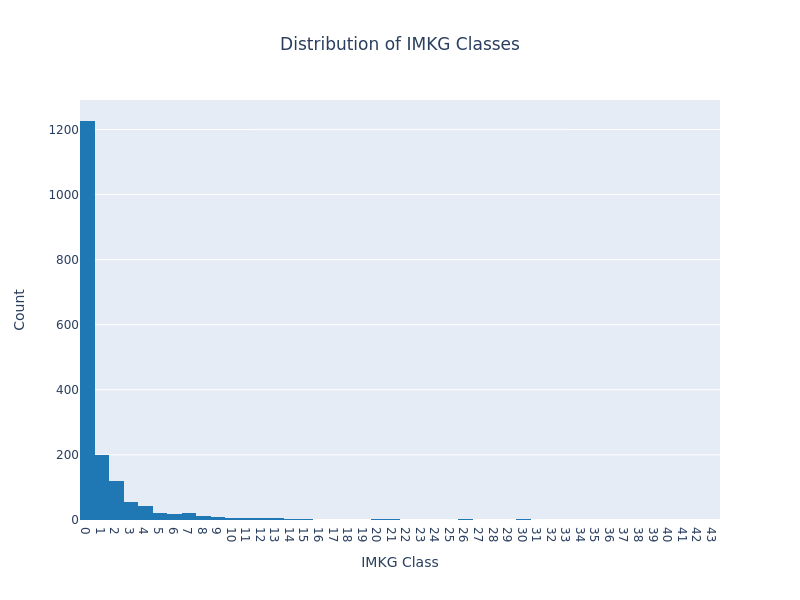

In [24]:
data_values=list(final_dict.values())
basic_hist_plotly(data_values, "#1F77B4", "IMKG Class", "Count", "Distribution of IMKG Classes")

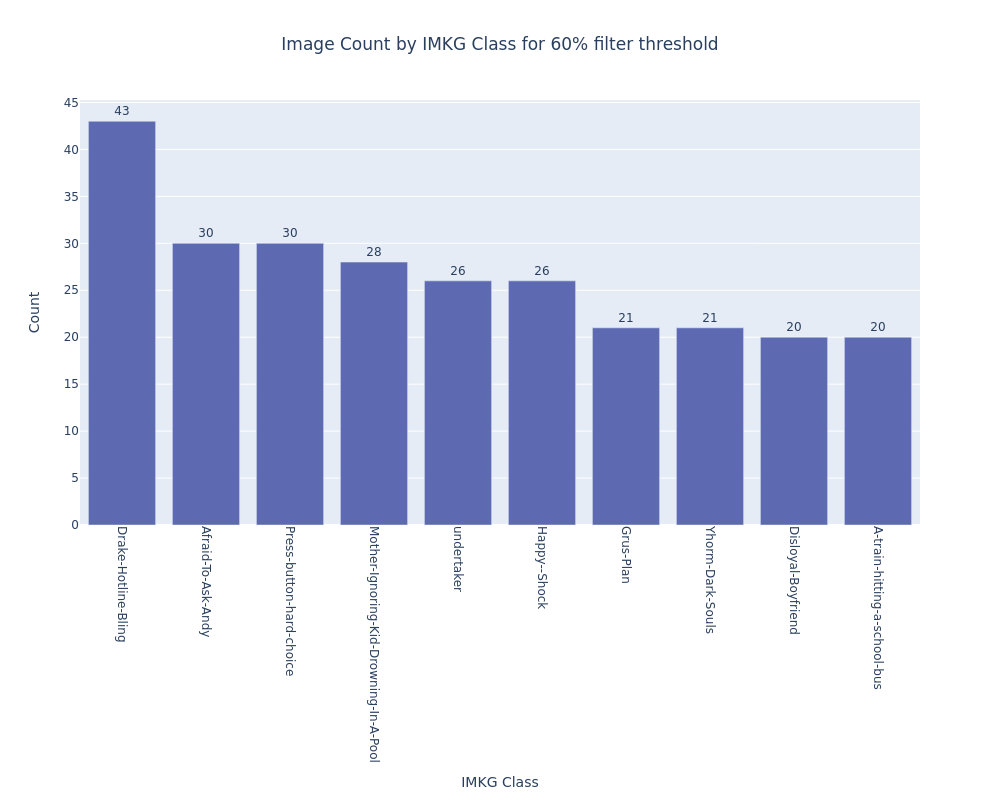

In [25]:
x = list(final_dict.keys())
y = list(final_dict.values())
x = [a.split(':')[-1].split('/')[-1] for a in x]
basic_bar_plotly(x[:10], y[:10], "IMKG Class", "Count", "Image Count by IMKG Class for 60% filter threshold", 90, "rgb(93, 105, 177)", 1000, 800)

# Discord

## Image Count upon Faiss Semantic Search Filtering

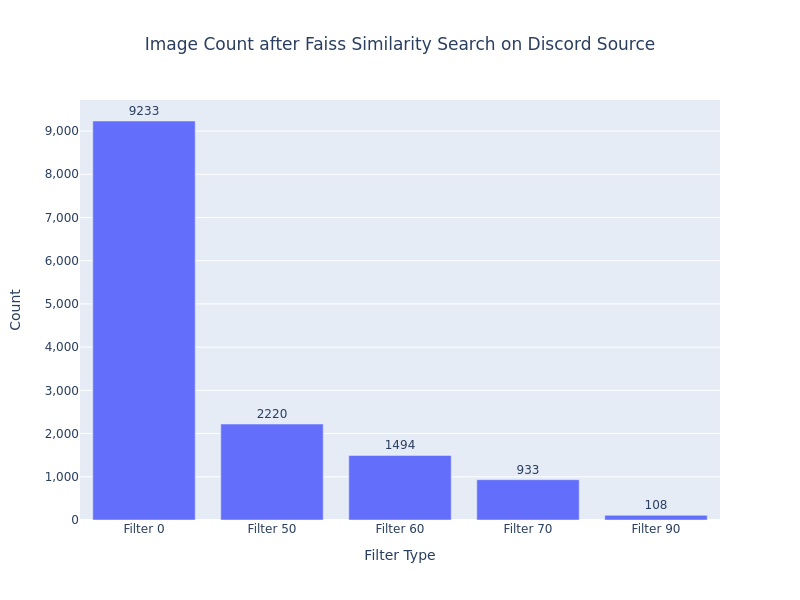

In [26]:
x = ["Filter 0", "Filter 50", "Filter 60", "Filter 70", "Filter 90"]
df50 = pd.read_csv('../out/new_discord_filtered_df_50_final.csv')
df60 = pd.read_csv('../out/new_discord_filtered_df_60_final.csv')
df70 = pd.read_csv('../out/new_discord_filtered_df_70_final.csv')
df90 = pd.read_csv('../out/new_discord_filtered_df_90_final.csv')
y = [9233, len(df50), len(df60), len(df70), len(df90)]
basic_bar_plotly(x, y, "Filter Type", "Count", \
    "Image Count after Faiss Similarity Search on Discord Source", 0, "#636EFA", 800, 600)

## Image Count in each Discord Channel after performing Similarity Search

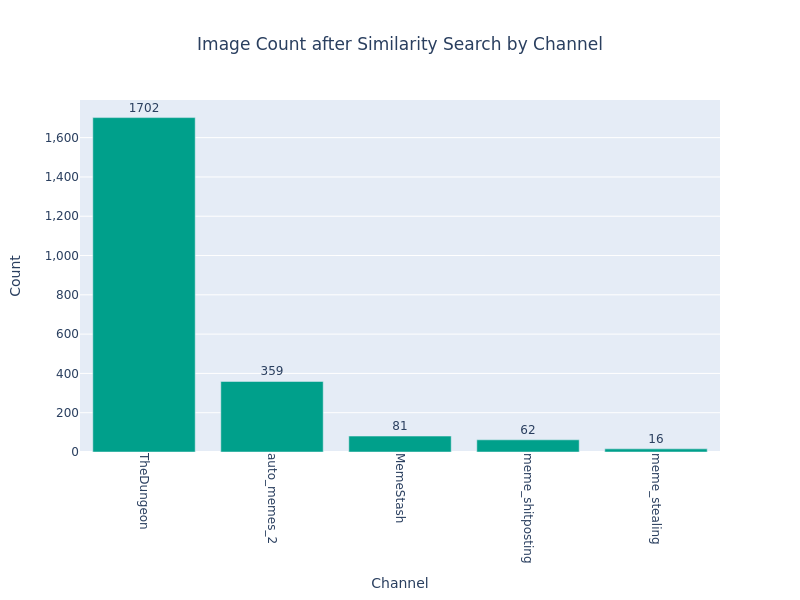

In [27]:
values = list(df50['channel'].value_counts().values)
channels = list(df50['channel'].value_counts().index)
basic_bar_plotly(channels, values, "Channel", "Count", \
    "Image Count after Similarity Search by Channel", 90, "#00A08B", 800, 600)

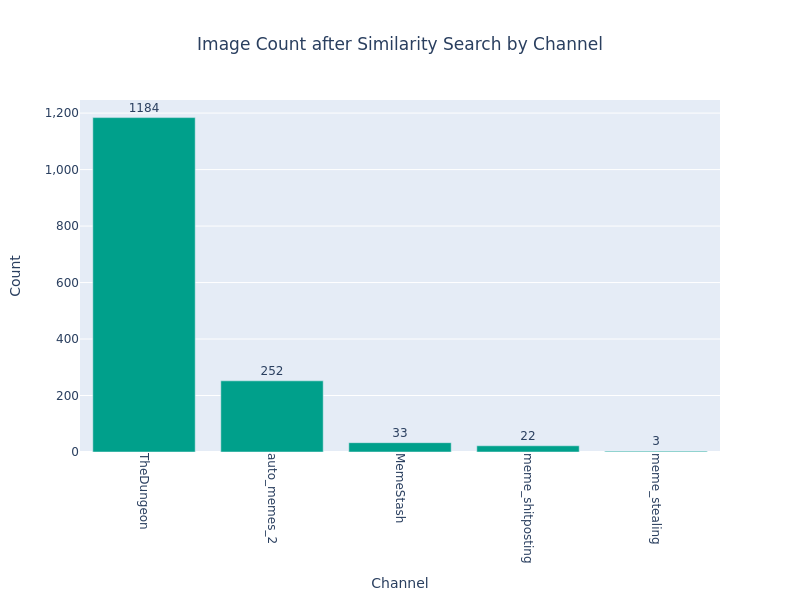

In [28]:
values = list(df60['channel'].value_counts().values)
channels = list(df60['channel'].value_counts().index)
basic_bar_plotly(channels, values, "Channel", "Count", \
    "Image Count after Similarity Search by Channel", 90, "#00A08B", 800, 600)

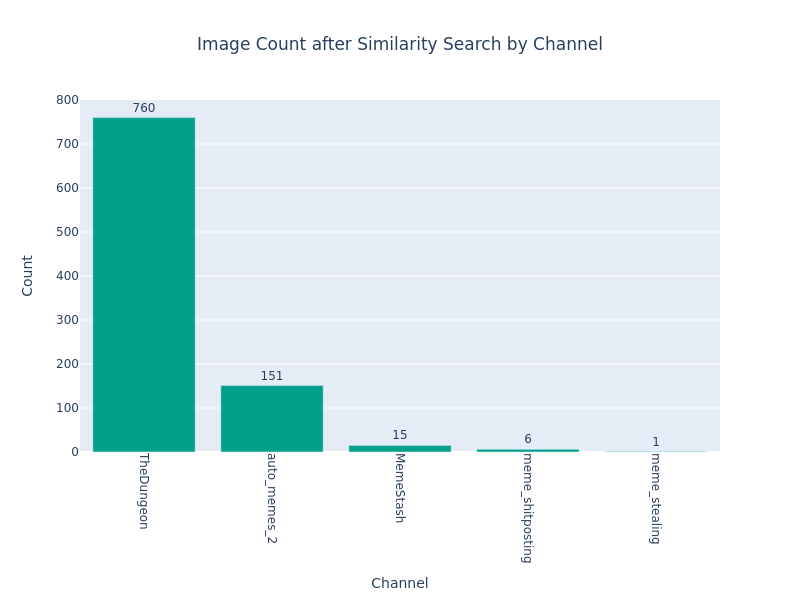

In [29]:
values = list(df70['channel'].value_counts().values)
channels = list(df70['channel'].value_counts().index)
basic_bar_plotly(channels, values, "Channel", "Count", \
    "Image Count after Similarity Search by Channel", 90, "#00A08B", 800, 600)

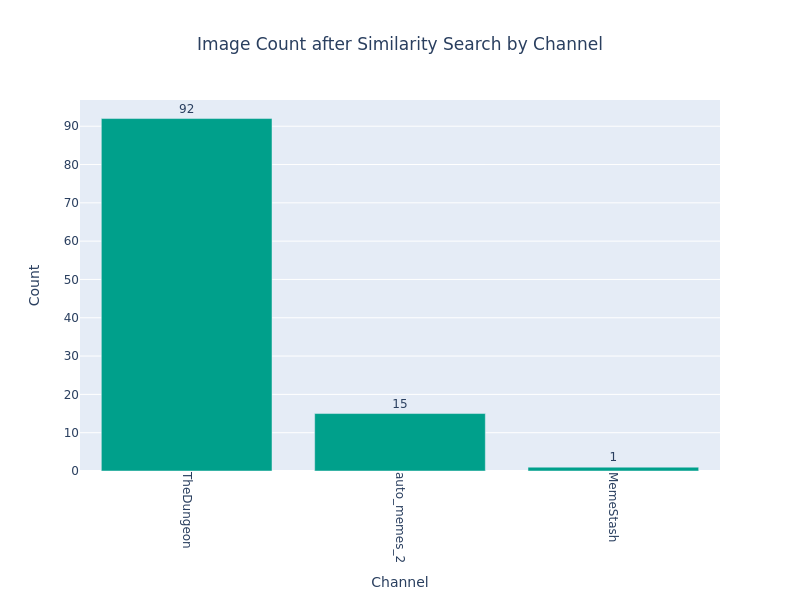

In [30]:
values = list(df90['channel'].value_counts().values)
channels = list(df90['channel'].value_counts().index)
basic_bar_plotly(channels, values, "Channel", "Count", \
    "Image Count after Similarity Search by Channel", 90, "#00A08B", 800, 600)

## IMKG Class Distribution for 60% Filter

In [31]:
imkg_templates = pd.read_csv('../graph/out/imkg_templates.tsv', sep='\t')
node1 = list(imkg_templates['node1'].values)
node2 = list(imkg_templates['node2'].values)
df_imkg_nodes = list(df60['imkg image'].values)
df_imkg_nodes = [x.split('/')[-1].split('.')[0] for x in df_imkg_nodes]
back_dict = {}
final_dict = {}
for x, y in tqdm(zip(node1, node2)):
    back_dict[x.split(':')[-1]] = y
for x in tqdm(df_imkg_nodes):
    get_imkg_name = back_dict[x]
    if get_imkg_name not in final_dict:
        final_dict[get_imkg_name] = 0
    final_dict[get_imkg_name] += 1
for x in node2:
    if x not in final_dict:
        final_dict[x] = 0
final_dict = dict(sorted(final_dict.items(), key=lambda x: x[1], reverse=True))

1326032it [00:01, 1000223.60it/s]
100%|██████████████████████████████████████████████████████████████████████████████████████| 1494/1494 [00:00<00:00, 670693.59it/s]


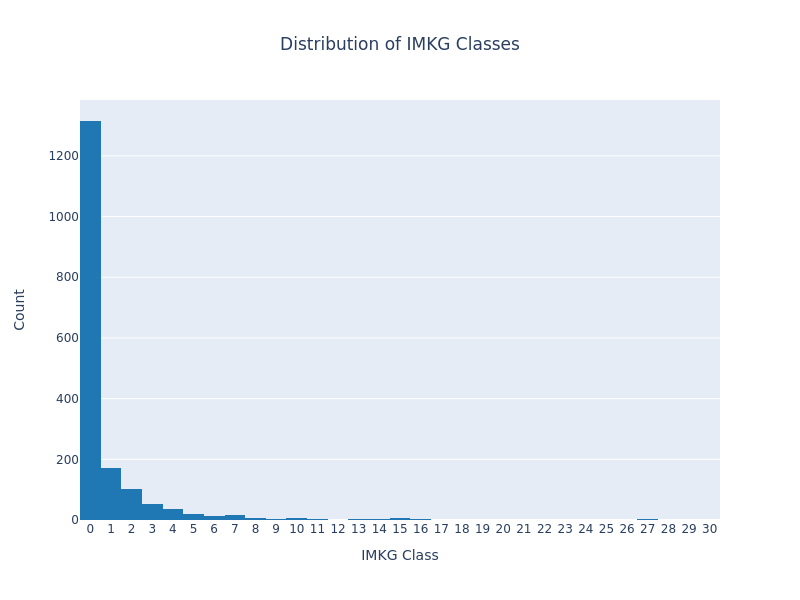

In [32]:
data_values=list(final_dict.values())
basic_hist_plotly(data_values, "#1F77B4", "IMKG Class", "Count", "Distribution of IMKG Classes")

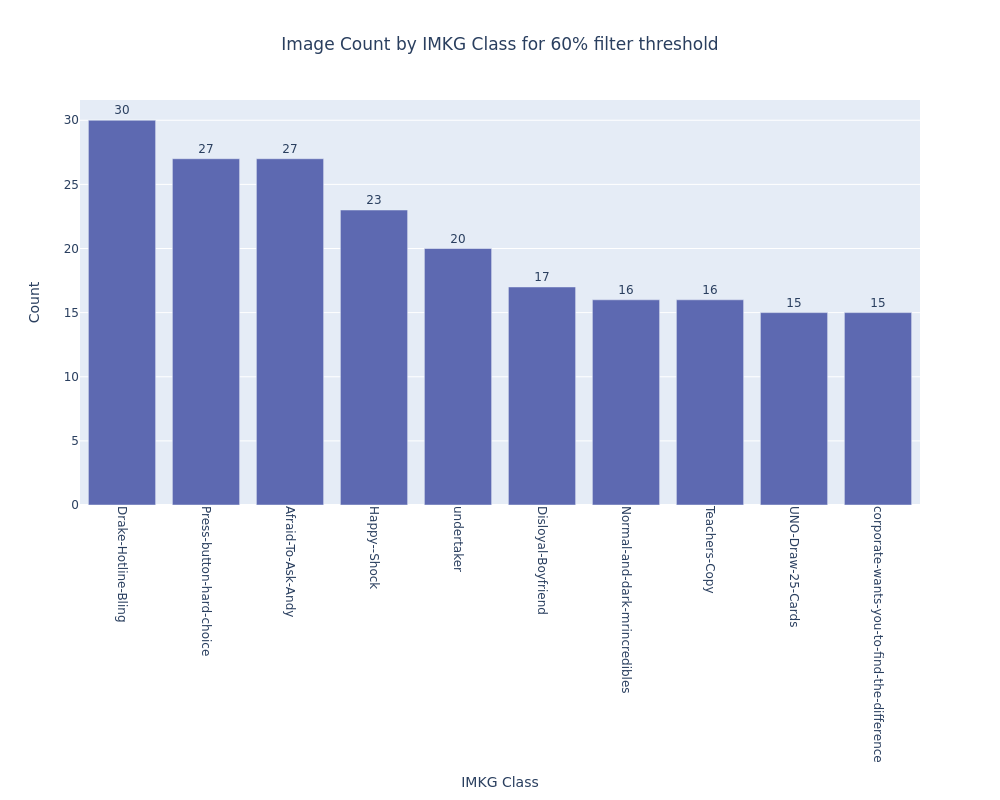

In [33]:
x = list(final_dict.keys())
y = list(final_dict.values())
x = [a.split(':')[-1].split('/')[-1] for a in x]
basic_bar_plotly(x[:10], y[:10], "IMKG Class", "Count", "Image Count by IMKG Class for 60% filter threshold", 90, "rgb(93, 105, 177)", 1000, 800)